<a href="https://colab.research.google.com/github/SBSATHISHKUMAR/Imarticus-Test-28-05-2022/blob/main/19BEC4188_S_B_SATHISHKUMAR_Imarticus_Test_28_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part I: Unsupervised Learning

Part I: Unsupervised Learning

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df=pd.read_csv("/content/credit_card (1).csv")

Q1).The primary analysis of several categorical 
features.

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

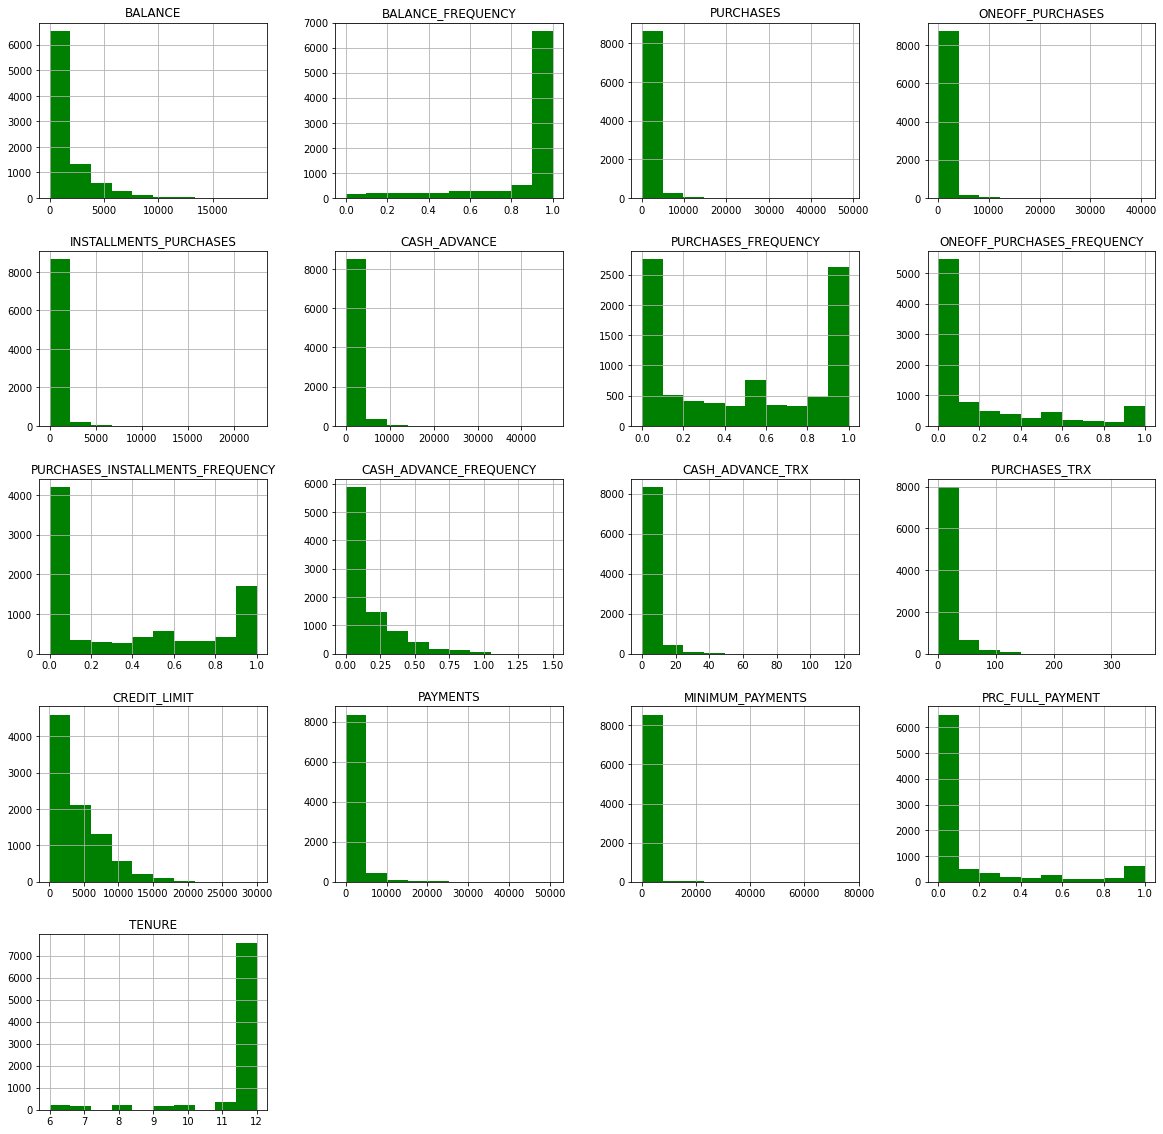

In [6]:
#Distribution of dataset columns
#histogram
import matplotlib.pyplot as plt
fig=df.hist(figsize=(20,20),color='green')
plt.show()

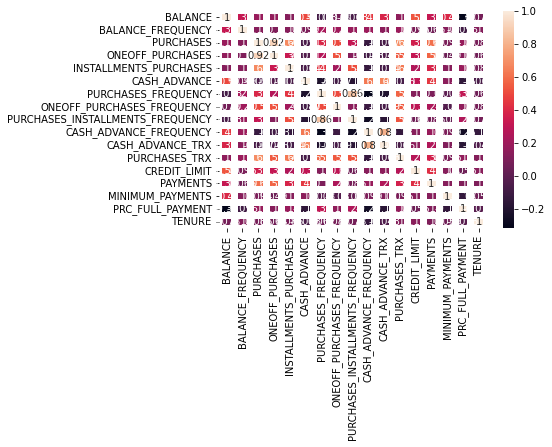

In [7]:
# heatmap
import seaborn as sns
sns.heatmap(df.corr(),annot=True,linewidths=6.0)
plt.show()

In [8]:
#Description
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
#Shape of the dataset
df.shape

(8950, 18)

In [10]:
#Datatypes
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Q2. Perform the following Exploratory Data Analysis tasks:
a. Missing Value Analysis
b. Outlier Treatment using the Z-score method
c. Deal with correlated variable

a. Missing Value Analysis

In [11]:
# checking for missing values

df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [12]:
#Filling the missing values
df.MINIMUM_PAYMENTS.mode()[0]
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mode()[0],inplace=True)
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
df.CREDIT_LIMIT.mode()[0]
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mode()[0],inplace=True)
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
#Droping unrequired Columns
df=df.drop(['CUST_ID'],axis=1)

In [15]:
#Remove duplicates
df=df.drop_duplicates()

b. Outlier Treatment using the Z-score method

In [16]:
import numpy as np
column=df.columns.values

In [17]:
mean = np.mean(df)
std = np.std(df)
print("Mean:\n",mean)
print("Standard Deviation:\n",std)

Mean:
 BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.282473
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     844.452407
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64
Standard Deviation:
 BALANCE                             2081.415590
BALANCE_FREQUENCY                      0.236891
PURCHASES                           2136.5154

c. Deal with correlated variable

In [18]:
#correlation
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397997,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131576,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095840,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050294,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134071,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140780,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006228,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027248,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032113,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100678,-0.249773,-0.133372


Q3. Perform dimensionality reduction using PCA such that the 
95% of the variance is explained

In [19]:
#assigning x and y values
x=df.drop(['TENURE'],axis=1)
y=df['TENURE']

In [20]:
#Traing and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.60,test_size=0.40,random_state=47)

x_train.shape,x_test.shape,y_train.shape,y_test.shape


((5370, 16), (3580, 16), (5370,), (3580,))

In [21]:
#importing models

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()


In [22]:
#Fitting of model
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [23]:
#predicting y 
predicted_y=model.predict(x_test)
predicted_y

array([12, 12, 12, ..., 12, 12, 12])

In [24]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,predicted_y)

0.8466480446927375

In [25]:
#making confusion matrix
confusion_matrix(y_test,predicted_y)

array([[   4,    1,    2,    0,    0,    0,   62],
       [   2,    1,    1,    0,    0,    0,   63],
       [   1,    2,    0,    0,    0,    0,   85],
       [   0,    0,    0,    0,    0,    0,   80],
       [   1,    0,    0,    0,    0,    0,   82],
       [   1,    1,    0,    0,    0,    0,  152],
       [   7,    1,    4,    0,    1,    0, 3026]])

In [26]:
#classification report
z=classification_report(y_test,predicted_y)
print(z) 

              precision    recall  f1-score   support

           6       0.25      0.06      0.09        69
           7       0.17      0.01      0.03        67
           8       0.00      0.00      0.00        88
           9       0.00      0.00      0.00        80
          10       0.00      0.00      0.00        83
          11       0.00      0.00      0.00       154
          12       0.85      1.00      0.92      3039

    accuracy                           0.85      3580
   macro avg       0.18      0.15      0.15      3580
weighted avg       0.73      0.85      0.78      3580



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

In [28]:
#fitting
pca.fit(x_train)

PCA(n_components=0.95)

In [29]:
#Transforming
xtrain_transformed=pca.transform(x_train)
print(xtrain_transformed.shape)

(5370, 5)


In [30]:
#Transforming
xtest_transformed=pca.transform(x_test)
print(xtest_transformed.shape)

(3580, 5)


In [31]:
#new model
new_model=LogisticRegression(penalty='l1',solver='liblinear')

In [32]:
#Fitting
new_model.fit(xtrain_transformed,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [33]:
#New prediction
new_predicition=new_model.predict(xtest_transformed)

In [34]:
y_test,predicted_y,new_predicition

(6492    12
 4006    12
 1439    12
 5898     6
 1031    12
         ..
 4920    12
 571     12
 4637    12
 8506     9
 2805    12
 Name: TENURE, Length: 3580, dtype: int64,
 array([12, 12, 12, ..., 12, 12, 12]),
 array([12, 12, 12, ..., 12, 12, 12]))

In [35]:
#  new accuracy 
from sklearn.metrics import accuracy_score
new_acc=accuracy_score(new_predicition,y_test)
new_acc

0.8488826815642458

Q4. Find the optimum value of k for k-means clustering using 
the elbow method. Plot the elbow curve

In [36]:
import sklearn
from sklearn.cluster import KMeans

In [37]:
wcss=[]  #With in cluster sum of squares

for i in range(1,7):
  kmeans=KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001,  
                verbose=0, 
                random_state=None, 
                copy_x=True,  
                algorithm='auto')
  
  kmeans.fit(df)

  wcss.append(kmeans.inertia_)  #Do for iterations 1 to 7 clusters, find out the min wcsss and add them

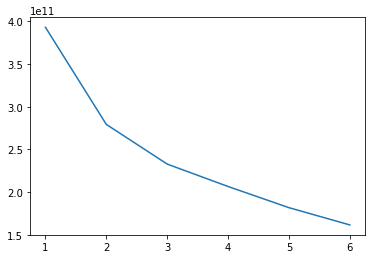

In [38]:
import matplotlib.pyplot as plt

plt.plot(range(1,7),wcss)  #Elbow Graph

Q5. Find the optimum value of k for k-means clustering using 
the silhouette score method and specify the number of 
observations in each cluster using a bar plot

Silhouette score for k(clusters) = 3 is 0.45812671876122785
Silhouette score for k(clusters) = 4 is 0.38213617623234636
Silhouette score for k(clusters) = 5 is 0.35989213869773073
Silhouette score for k(clusters) = 6 is 0.3786654083397706
Silhouette score for k(clusters) = 7 is 0.35478473187393456
Silhouette score for k(clusters) = 8 is 0.3616414301738822
Silhouette score for k(clusters) = 9 is 0.3415849355128949


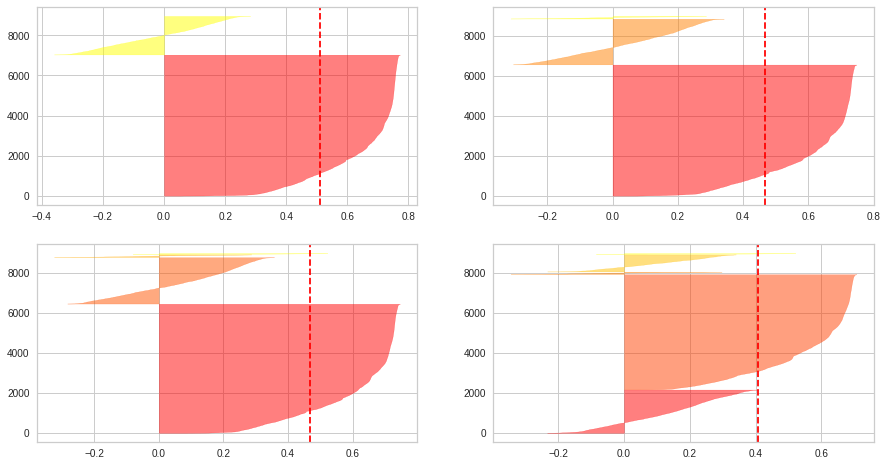

In [39]:
import sklearn.metrics as metrics
for i in range(3,10):
    kmeans=KMeans(n_clusters=i,
                  init="k-means++",
                  random_state=200)
    kmeans.fit(df)
    labels=kmeans.labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,
                                         labels,
                                         metric="euclidean",
                                         sample_size=1000,
                                         random_state=200)))
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='autumn', ax=ax[q-1][mod])
    visualizer.fit(x)

#Part II: Deep Learning 

Q1. Print the total number of positive and negative sentiments.

In [40]:
df1=pd.read_csv("/content/Sentiment.csv")

In [41]:
#Print the total number of positive and negative sentiments.
positive=0
negative=0
for i in df1['sentiment']:
  if i =='Positive':
    positive=positive+1
  elif i=='Negative':
    negative=negative+1
print("Number of Positive_Sentences-->", positive)
print("Number of Negative_Sentences-->", negative)

Number of Positive_Sentences--> 2236
Number of Negative_Sentences--> 8493


Q2. Build a sequential LSTM model to predict positive and 
negative sentiments.

In [42]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', 
                    df1['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [50]:
corpus

['rt nancyleegrahn everyon feel climat chang question last night exactli gopdeb',
 'rt scottwalk catch full gopdeb last night scott best line second walker http co zsff',
 'rt tjmshow mention tamir rice gopdeb held cleveland wow',
 'rt robgeorg carli fiorina trend hour debat men complet gopdeb say',
 'rt danscavino gopdeb w realdonaldtrump deliv highest rate histori presidenti debat trump http co',
 'rt gregabbott tx tedcruz first day rescind everi illeg execut action taken barack obama gopdeb foxnew',
 'rt warriorwoman like happi heard go moder anymor gopdeb megynkelli http',
 'go msnbc live thomasarobert around pm et gopdeb',
 'deer headlight rt lizzwinstead ben carson may brain surgeon perform lobotomi gopdeb',
 'rt nancyosborn last night debat prove gopdeb batsask badassteachersa tbat http co g ggji bjd',
 'jgreendc realdonaldtrump fair billclinton own phrase gopdeb',
 'rt waynedupreeshow woke tweet gopdeb best line night via govmikehuckabe http co ov hxhicv',
 'read famili comment

Q3.
Based on the model, check the sentiment for the following 
two sentences

a. 'He is a great leader.'

b. 'He is a terrible leader.'